In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.rcParams.update(mpl.rcParamsDefault) # reset plot to default
mpl.style.use(['ggplot']) # optional: for ggplot-like style

In [3]:
# Se crea el dataframe de migrantes chilenos
df_chi = pd.read_excel('MigrantesChile (2005-2016).xlsx',
                      sheet_name='Migrantes',
                      skipfooter=3)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
# Cambiamos el indice y eliminamos las columnas que no nos interesan

df_chi.drop(['ID Continent','ID Country'], axis=1, inplace=True)

df_chi.set_index('Country', inplace=True)

df_chi.index.name = None

df_chi

,Continent,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Afghanistan,Asia,8,4,5,1,2,1,3,6,15,4,12,15
Albania,Europe,2,1,1,2,2,5,3,2,1,2,7,11
Germany,Europe,495,481,562,614,587,644,685,747,687,845,778,582
Andorra,Europe,2,1,1,1,0,0,2,0,1,2,2,1
Angola,Africa,1,2,4,3,2,4,6,8,1,1,13,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uganda,Africa,0,0,0,0,0,0,1,0,1,0,1,0
Uruguay,America,1077,1099,1275,1271,1171,1190,1075,1186,956,957,1072,858
Uzbekistan,Asia,2,4,1,2,0,1,2,4,2,1,1,4
Venezuela,America,567,618,773,819,1013,1091,1453,1760,2015,3557,9730,26623


In [5]:
# Agregamos una columna con el total de migrantes por pais

df_chi['Total'] = df_chi.sum(axis=1, numeric_only=True)

df_chi

,Continent,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Afghanistan,Asia,8,4,5,1,2,1,3,6,15,4,12,15,76
Albania,Europe,2,1,1,2,2,5,3,2,1,2,7,11,39
Germany,Europe,495,481,562,614,587,644,685,747,687,845,778,582,7707
Andorra,Europe,2,1,1,1,0,0,2,0,1,2,2,1,13
Angola,Africa,1,2,4,3,2,4,6,8,1,1,13,19,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uganda,Africa,0,0,0,0,0,0,1,0,1,0,1,0,3
Uruguay,America,1077,1099,1275,1271,1171,1190,1075,1186,956,957,1072,858,13187
Uzbekistan,Asia,2,4,1,2,0,1,2,4,2,1,1,4,24
Venezuela,America,567,618,773,819,1013,1091,1453,1760,2015,3557,9730,26623,50019


In [6]:
#Ordenamos el dataframe por el total de migrantes

df_chi.sort_values(by='Total', ascending=False, inplace=True)

df_chi

,Continent,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Peru,America,25966,32746,63869,47336,56586,38048,40628,49643,48517,49900,59767,53624,566630
Colombia,America,2179,3195,4834,5563,7697,8921,14362,20875,30138,33939,44535,47352,223590
Bolivia,America,2420,2815,7448,5374,7801,7423,9189,17310,30611,34978,39126,27852,192347
Argentina,America,6263,6114,5656,5345,5453,5387,5438,6548,7436,8326,9605,8176,79747
Ecuador,America,2956,3135,4352,3933,4674,3624,3938,4679,4992,5309,6374,7261,55227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eswatini,Africa,0,0,0,0,0,0,1,0,0,0,0,0,1
Samoa,Oceania,0,0,0,0,1,0,0,0,0,0,0,0,1
Gabon,Africa,0,0,0,1,0,0,0,0,0,0,0,0,1
Niger,Africa,0,0,0,0,0,0,0,1,0,0,0,0,1


In [56]:
# Creamos un dataframe para cada continente

df_chi_asia = df_chi[(df_chi['Continent'] == 'Asia')]
df_chi_america = df_chi[(df_chi['Continent'] == 'America')]
df_chi_europe = df_chi[(df_chi['Continent'] == 'Europe')]
df_chi_oceania = df_chi[(df_chi['Continent'] == 'Oceania')]
df_chi_africa = df_chi[(df_chi['Continent'] == 'Africa')]

In [8]:
# Se crea un dataframe para los 5 paises con mas migrantes de cada continente

df_chi_continentes = pd.concat([df_chi_asia.head(1), df_chi_america.head(1), df_chi_europe.head(1), df_chi_oceania.head(1), df_chi_africa.head(1)])

df_chi_continentes.drop(['Continent'], axis=1, inplace=True)

df_chi_continentes.drop(['Total'], axis=1, inplace=True)

df_chi_continentes

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
China,1131,1210,1517,1659,2054,2041,2295,2609,2669,3010,3583,3569
Peru,25966,32746,63869,47336,56586,38048,40628,49643,48517,49900,59767,53624
Spain,825,869,944,936,1092,1170,1508,2989,5737,6262,6313,4458
Australia,123,160,145,200,186,186,262,291,293,244,235,154
South Africa,43,52,58,89,94,69,100,96,94,93,89,65


In [9]:
continentes = df_chi_continentes.transpose()

continentes.index = continentes.index.map(int)

continentes

,China,Peru,Spain,Australia,South Africa
2005,1131,25966,825,123,43
2006,1210,32746,869,160,52
2007,1517,63869,944,145,58
2008,1659,47336,936,200,89
2009,2054,56586,1092,186,94
2010,2041,38048,1170,186,69
2011,2295,40628,1508,262,100
2012,2609,49643,2989,291,96
2013,2669,48517,5737,293,94
2014,3010,49900,6262,244,93


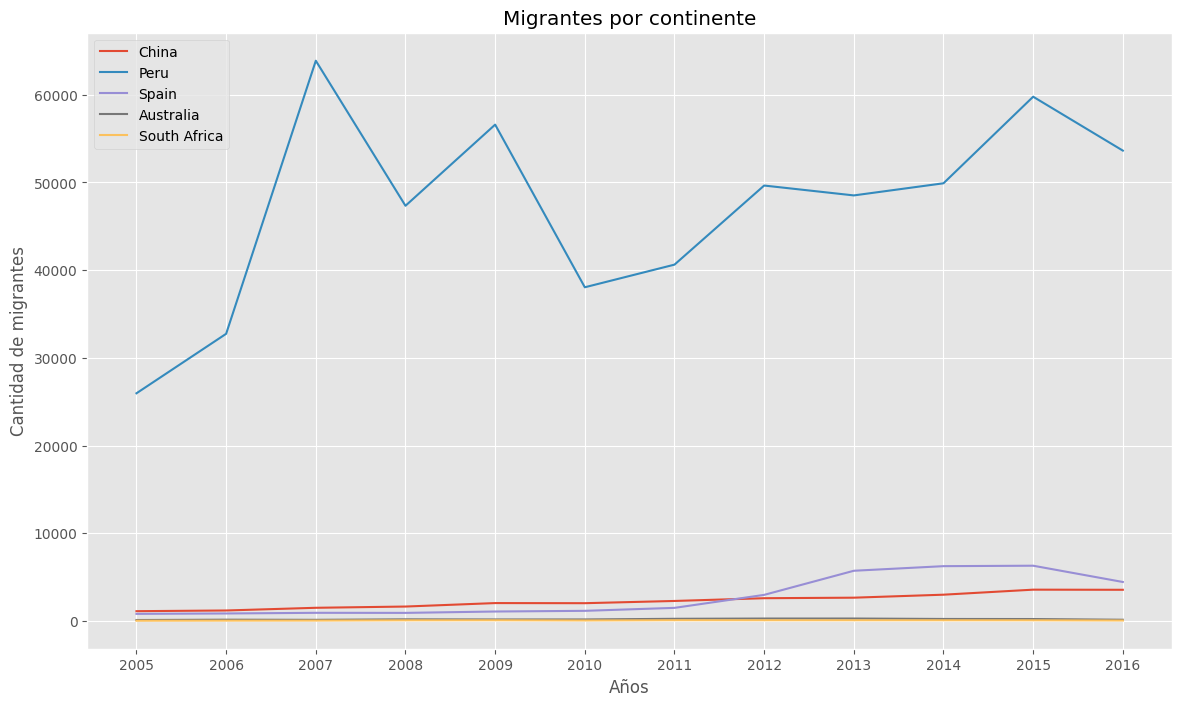

In [47]:
# Lineplot con la migración desde los 5 países, uno por continente, 
# que aporten más inmigrantes de su respectivo continente, con cantidad 
# total o cantidad en un año determinado.

continentes.plot(kind='line', figsize=(14,8))

plt.title('Migrantes por continente')
plt.ylabel('Cantidad de migrantes')
plt.xlabel('Años')

plt.xticks(np.arange(min(continentes.index), max(continentes.index)+1, 1.0))

plt.show()

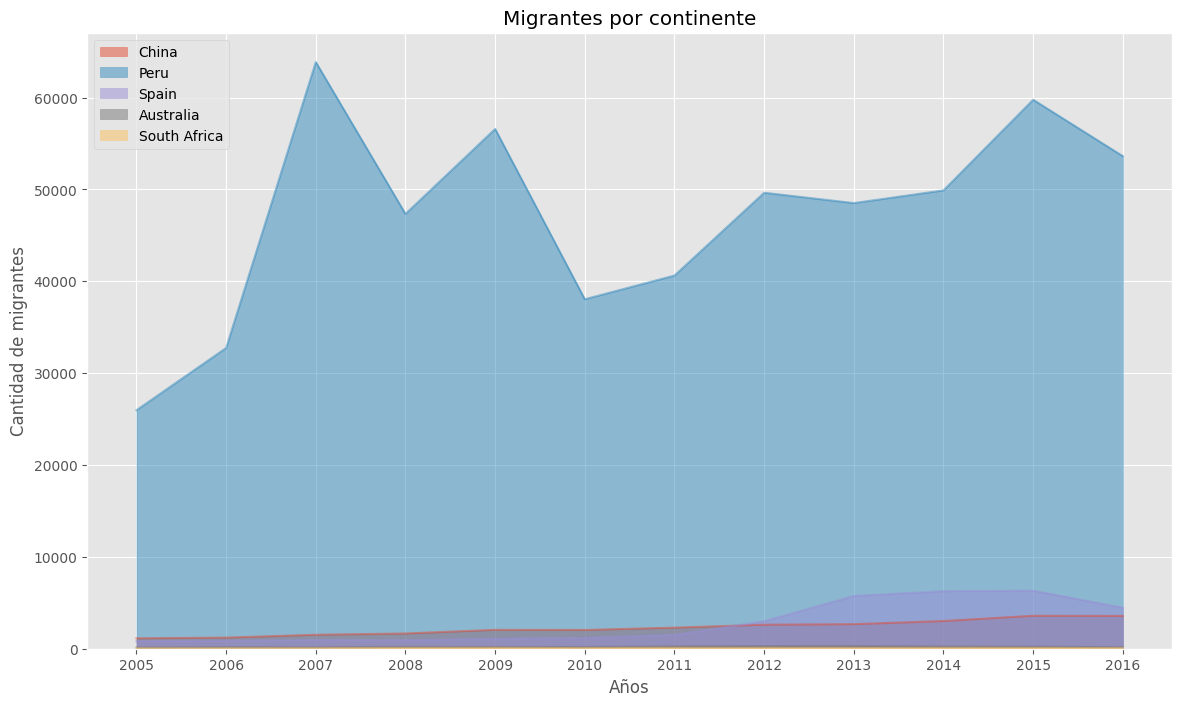

In [48]:
# Area plots para la misma consulta de 1, apilado y no apilado.

continentes.plot(kind='area',
                 stacked=False,
                 figsize=(14, 8))

plt.title('Migrantes por continente')
plt.ylabel('Cantidad de migrantes')
plt.xlabel('Años')

plt.xticks(np.arange(min(continentes.index), max(continentes.index)+1, 1.0))

plt.show()

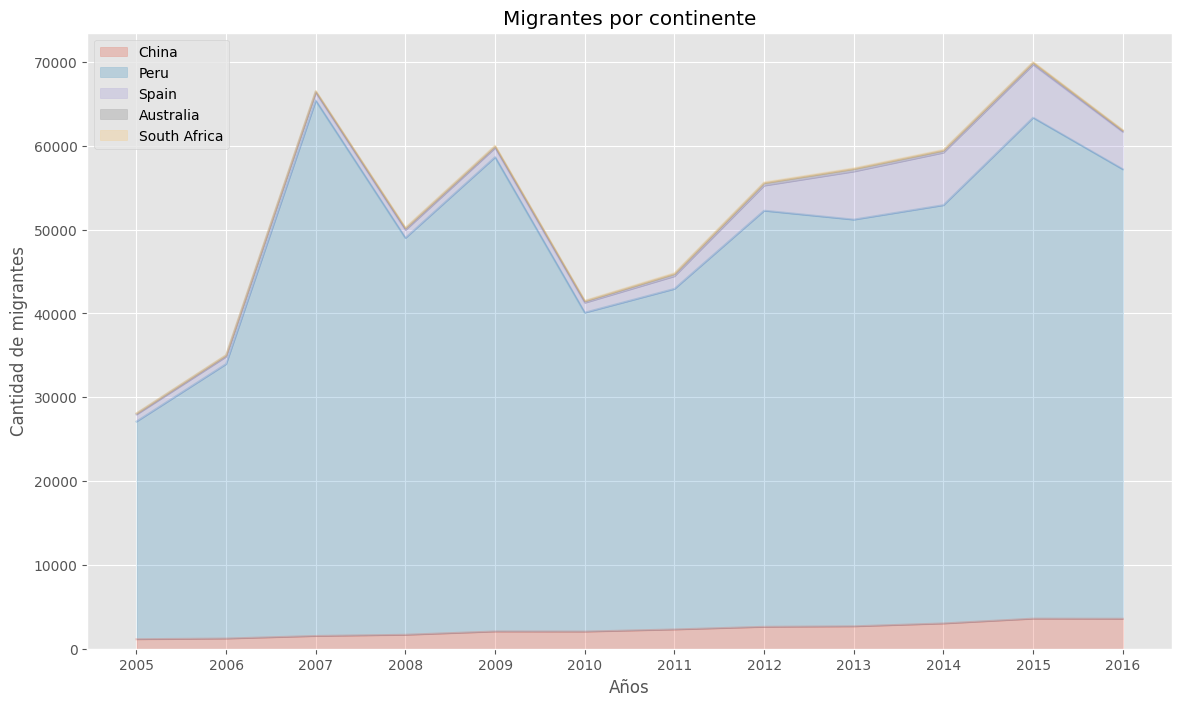

In [51]:
# Area plots para la misma consulta de 1, apilado y no apilado.

continentes.plot(kind='area',
                 alpha=0.25,
                 stacked=True,
                 figsize=(14, 8))

plt.title('Migrantes por continente')
plt.ylabel('Cantidad de migrantes')
plt.xlabel('Años')

plt.xticks(np.arange(min(continentes.index), max(continentes.index)+1, 1.0))

plt.show()

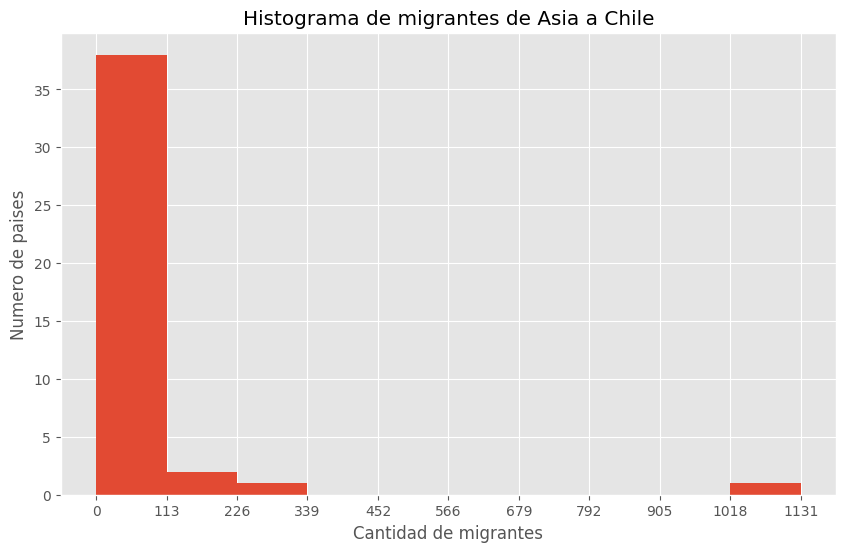

In [53]:
# Histogramas comparativos de migrantes por país: un histograma por continente, 
# con cantidad total o cantidad en un año determinado.

# para marcar los limites del histograma en el eje x
count, bin_edges = np.histogram(df_chi_asia['Total'])

df_chi_asia['Total'].plot(kind='hist', xticks=bin_edges, figsize=(10, 6))

plt.title('Histograma de migrantes de Asia a Chile')
plt.ylabel('Numero de paises')
plt.xlabel('Cantidad de migrantes')

plt.show()

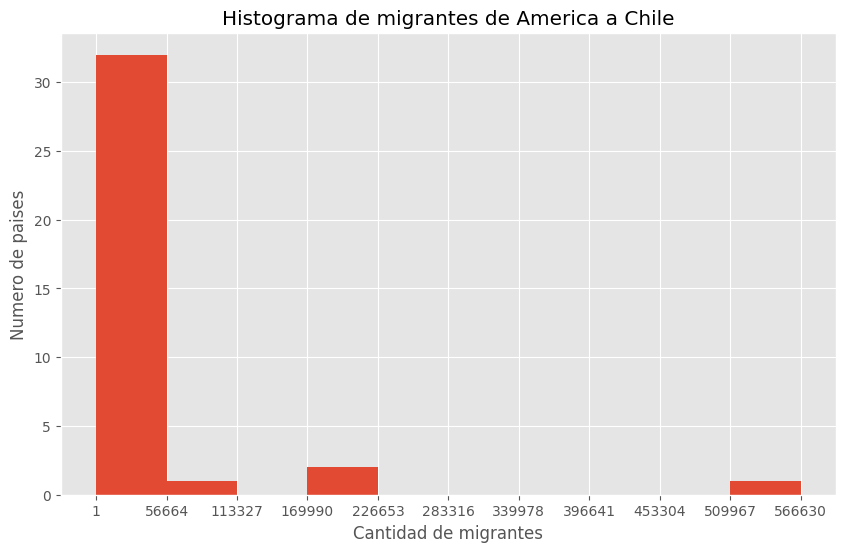

In [14]:
count, bin_edges = np.histogram(df_chi_america['Total'])

df_chi_america['Total'].plot(kind='hist', xticks=bin_edges, figsize=(10, 6))

plt.title('Histograma de migrantes de America a Chile')
plt.ylabel('Numero de paises')
plt.xlabel('Cantidad de migrantes')

plt.show()

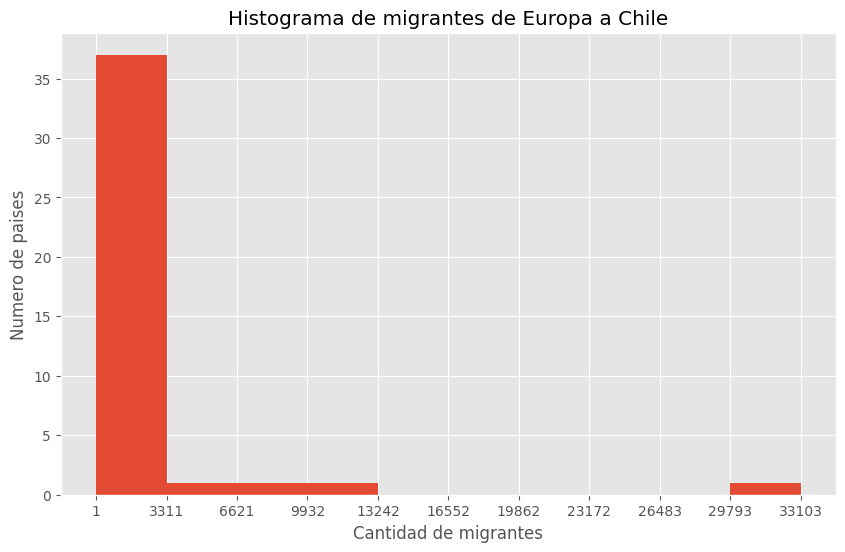

In [15]:
count, bin_edges = np.histogram(df_chi_europe['Total'])

df_chi_europe['Total'].plot(kind='hist', xticks=bin_edges, figsize=(10, 6))

plt.title('Histograma de migrantes de Europa a Chile')
plt.ylabel('Numero de paises')
plt.xlabel('Cantidad de migrantes')

plt.show()

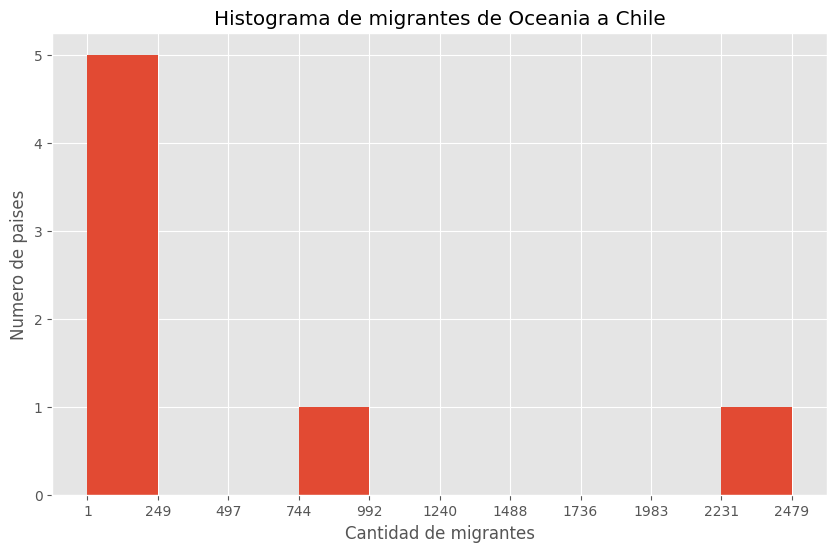

In [16]:
count, bin_edges = np.histogram(df_chi_oceania['Total'])

df_chi_oceania['Total'].plot(kind='hist' ,xticks=bin_edges, figsize=(10, 6))

plt.title('Histograma de migrantes de Oceania a Chile')
plt.ylabel('Numero de paises')
plt.xlabel('Cantidad de migrantes')

plt.show()

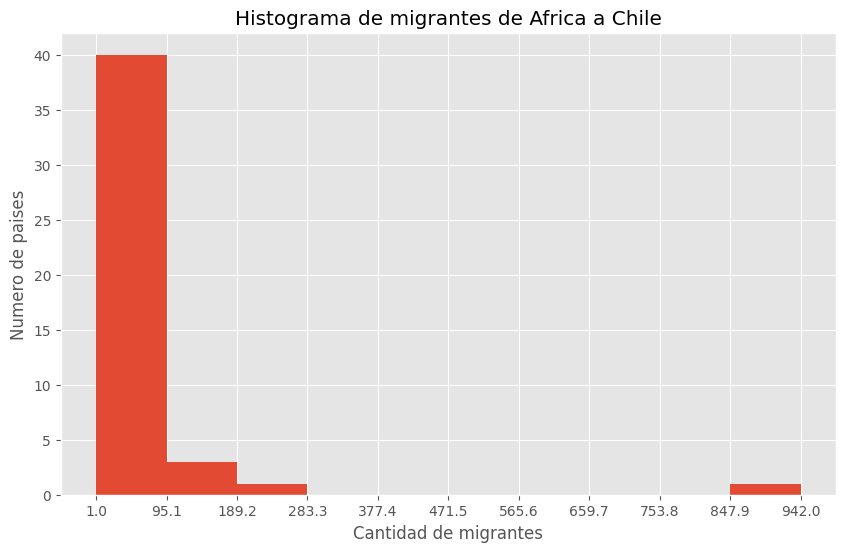

In [17]:
count, bin_edges = np.histogram(df_chi_africa['Total'])

df_chi_africa['Total'].plot(kind='hist' ,xticks=bin_edges, figsize=(10, 6))

plt.title('Histograma de migrantes de Africa a Chile')
plt.ylabel('Numero de paises')
plt.xlabel('Cantidad de migrantes')

plt.show()


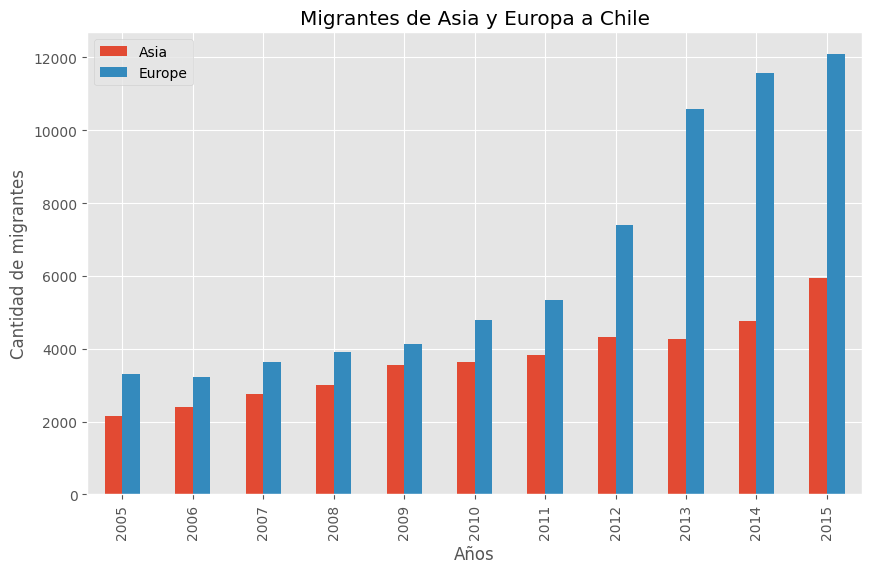

In [18]:
# Bar chart para comparar los migrantes de dos continentes cualquiera, 
# con cantidad total o cantidad en un año determinado.

years = list(map(int, range(2005, 2016)))

# Migrantes de Asia a Chile

asia = df_chi_asia.loc[:, years].transpose()

asia['Asia'] = asia.sum(axis=1) # EL total de migrantes de Asia por año

asia = asia.loc[:, ['Asia']] # Seleccionamos solo la columna del total

# Migrantes de Europa a Chile

europe = df_chi_europe.loc[:, years].transpose()

europe['Europe'] = europe.sum(axis=1) # EL total de migrantes de Europa por año

europe = europe.loc[:, ['Europe']]

# Migrantes de Europa y Asia a Chile

asia_europe = pd.concat([asia, europe], axis=1) # Unimos los dos dataframes

asia_europe.plot(kind='bar', figsize=(10, 6))

plt.title('Migrantes de Asia y Europa a Chile')
plt.ylabel('Cantidad de migrantes')
plt.xlabel('Años')

plt.show()


In [19]:
# Pie chart de migrantes desde los 5 países europeos que aportan más inmigrantes,
# con cantidad total o cantidad en un año determinado.

top5_europe = df_chi_europe.head(5)

top5_europe = top5_europe.loc[:, years]

top5_europe['Total'] = top5_europe.sum(axis=1)

top5_europe

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Total
Spain,825,869,944,936,1092,1170,1508,2989,5737,6262,6313,28645
France,569,571,688,710,674,856,862,1052,1095,1190,1339,9606
Germany,495,481,562,614,587,644,685,747,687,845,778,7125
Italia,269,255,269,316,370,626,526,562,724,723,865,5505
United Kingdom,227,192,228,255,284,269,236,281,279,280,248,2779


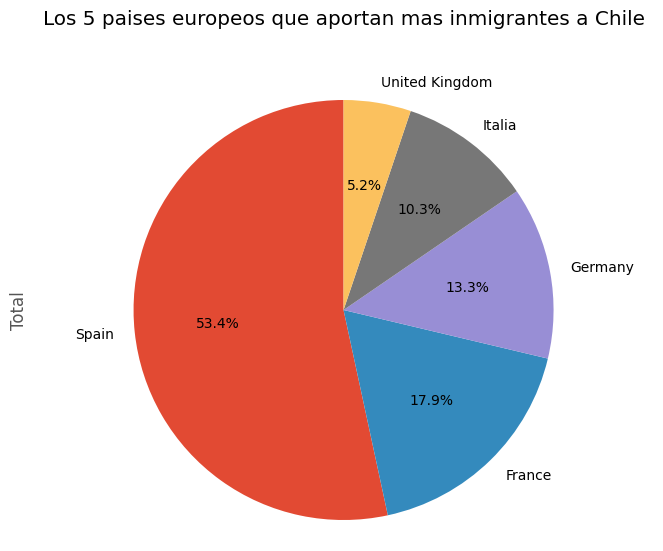

In [46]:
top5_europe['Total'].plot(  kind='pie',
                            figsize=(8, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            #labels=None,
                        )

plt.title('Los 5 paises europeos que aportan mas inmigrantes a Chile', y=1.10)
plt.axis('equal')

# plt.legend(labels=top5_europe.index, loc='upper left') 

plt.show()

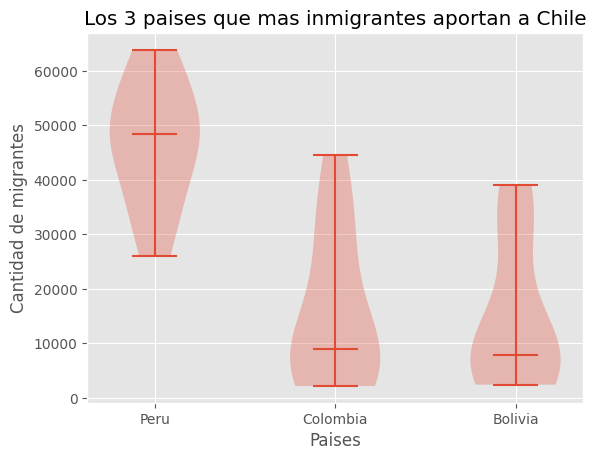

In [21]:
# Violin plot con los tres países que más inmigrantes aportan, 
# en total o en un año determinado.

top3 = df_chi.head(3)

top3 = top3.loc[:, years].transpose()

grafico = plt.violinplot(top3, showmedians=True)

plt.title('Los 3 paises que mas inmigrantes aportan a Chile')
plt.xlabel('Paises')
plt.ylabel('Cantidad de migrantes')

plt.xticks([1, 2, 3], [top3.columns[0], top3.columns[1], top3.columns[2]])

plt.show()